<a href="https://colab.research.google.com/github/VictorRojano28/Filtro-Sharpen-a-CIFAR-10/blob/main/Filtro_Sharpen_CIFAR_10_RojanoContrerasLuisVictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link del dataset CIFAR-10](https://www.tensorflow.org/datasets/catalog/cifar10?hl=es-419)


Evaluando filtro: ORIGINAL


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


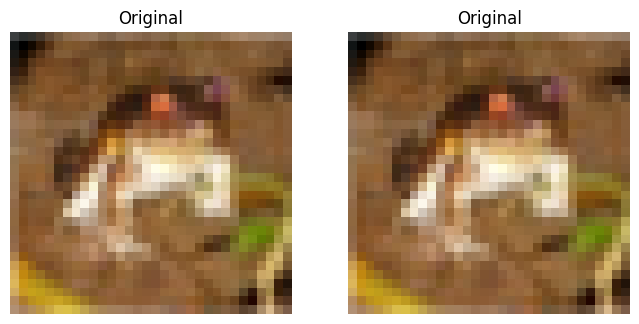


Evaluando filtro: SOBEL


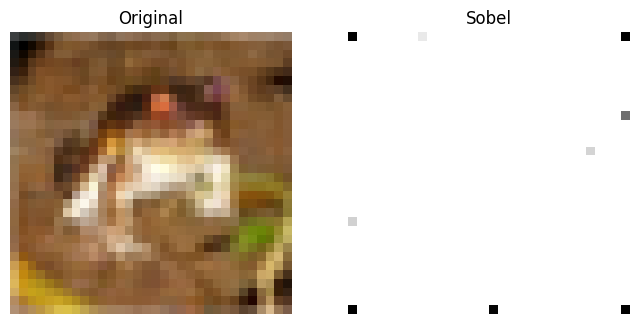


Evaluando filtro: GAUSSIAN


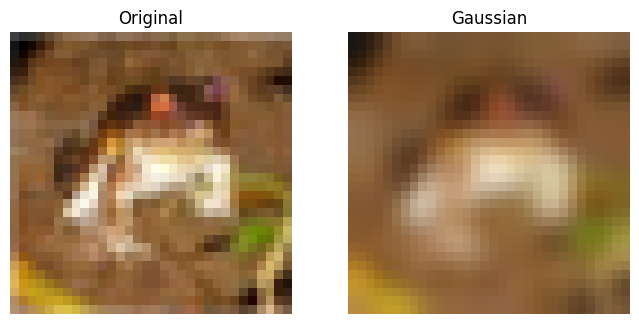


Evaluando filtro: SHARPEN


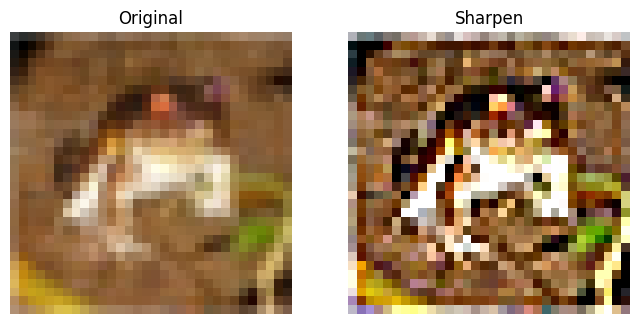


Evaluando filtro: MEDIAN


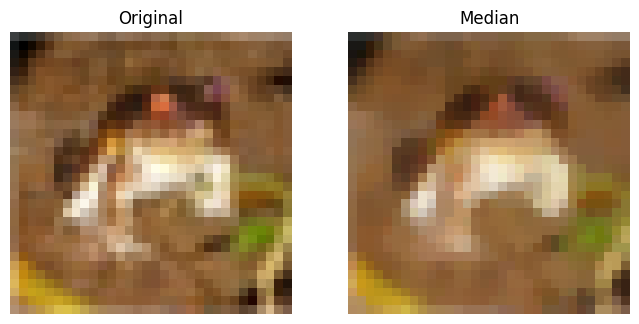


Resultados Finales:
ORIGINAL  : 0.6970
SOBEL     : 0.5725
GAUSSIAN  : 0.6443
SHARPEN   : 0.7190
MEDIAN    : 0.6698


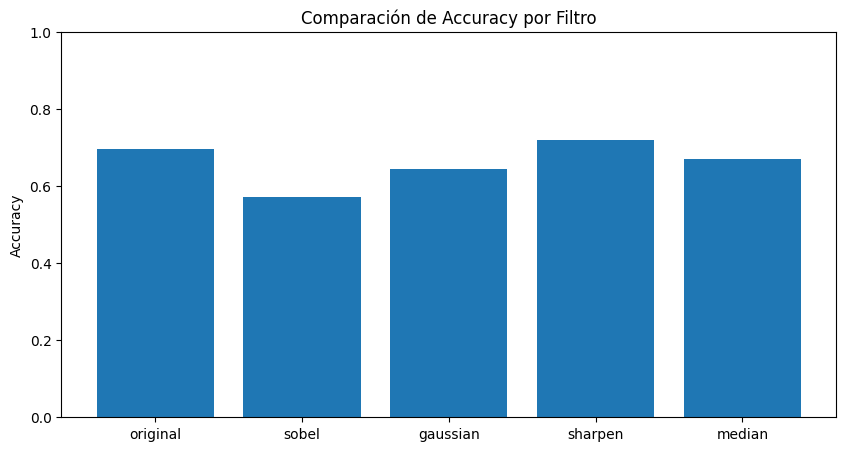

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

#Cargar datos originales CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

#Definir función para aplicar filtros
def apply_filter(images, filter_type='original'):
    if filter_type == 'original':
        return images
    processed_images = []
    for img in images:
        if filter_type == 'sobel':
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
            sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
            filtered = np.sqrt(sobelx**2 + sobely**2)
            filtered = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX)
            filtered = np.stack([filtered]*3, axis=-1)
        elif filter_type == 'gaussian':
            filtered = cv2.GaussianBlur(img, (5,5), 1.5)
        elif filter_type == 'sharpen':
            kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
            filtered = cv2.filter2D(img, -1, kernel)
        elif filter_type == 'median':
            filtered = cv2.medianBlur(img, 3)
        processed_images.append(filtered)
    return np.array(processed_images)

def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

#Evaluar todos los filtros
filters = ['original', 'sobel', 'gaussian', 'sharpen', 'median']
results = {}

for filter_type in filters:
    print(f"\n{'='*40}\nEvaluando filtro: {filter_type.upper()}\n{'='*40}")

    X_train_filtered = apply_filter(X_train, filter_type)
    X_test_filtered = apply_filter(X_test, filter_type)
    model = create_model()
    history = model.fit(X_train_filtered, y_train,
                       epochs=10,
                       batch_size=64,
                       validation_data=(X_test_filtered, y_test_cat),
                       verbose=0)

    #Evaluar
    test_loss, test_acc = model.evaluate(X_test_filtered, y_test_cat, verbose=0)
    results[filter_type] = test_acc
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(X_train[0])
    plt.title("Original")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(X_train_filtered[0])
    plt.title(f"{filter_type.capitalize()}")
    plt.axis('off')
    plt.show()

print("\nResultados Finales:")
for filter_type, acc in results.items():
    print(f"{filter_type.upper():<10}: {acc:.4f}")

plt.figure(figsize=(10,5))
plt.bar(results.keys(), results.values())
plt.title("Comparación de Accuracy por Filtro")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

Forma de los datos de entrenamiento: (50000, 32, 32, 3)
Forma de las etiquetas de entrenamiento: (50000, 1)
Forma de los datos de prueba: (10000, 32, 32, 3)
Forma de las etiquetas de prueba: (10000, 1)


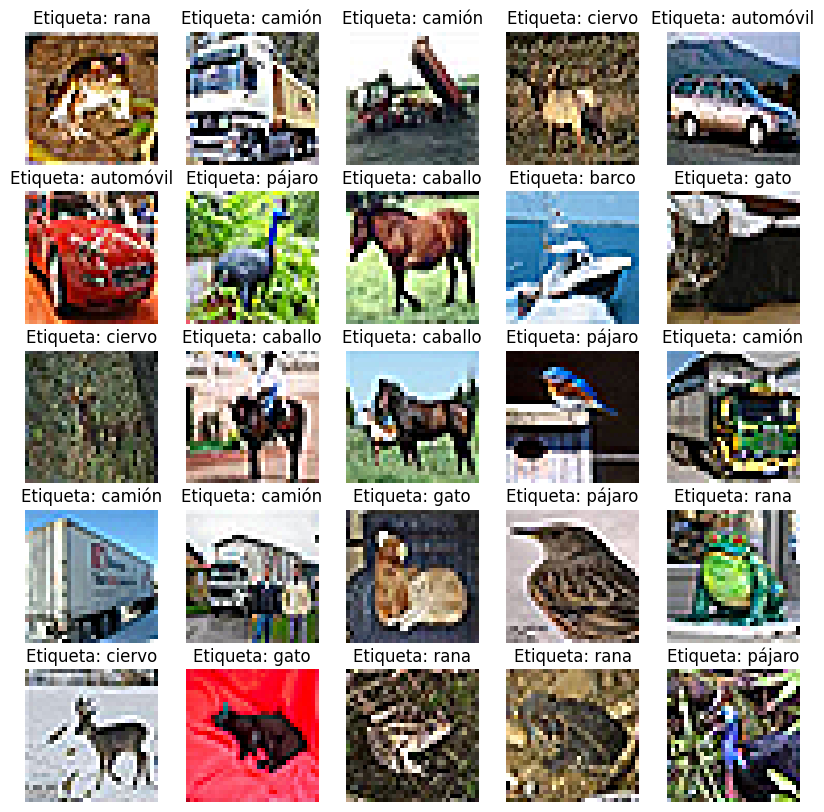

Nueva forma de y_train: (50000, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 622,282 (2.37 MB)

 Trainable params: 621,322 (2.37 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3688 - loss: 2.0488 - val_accuracy: 0.4609 - val_loss: 1.5331 - learning_rate: 0.0010
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5858 - loss: 1.1672 - val_accuracy: 0.6455 - val_loss: 1.0185 - learning_rate: 0.0010
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6366 - loss: 1.0298 - val_accuracy: 0.7008 - val_loss: 0.8544 - learning_rate: 0.0010
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6642 - loss: 0.9581 - val_accuracy: 0.6771 - val_loss: 0.9122 - learning_rate: 0.0010
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6821 - loss: 0.9007 - val_accuracy: 0.7107 - val_loss: 0.8191 - learning_rate: 0.0010
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7019 - loss: 0.8522 - val_accuracy: 0.6946 - val_loss: 0.8637 - learning_rate: 0.0010
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7148 - loss: 0.8149 

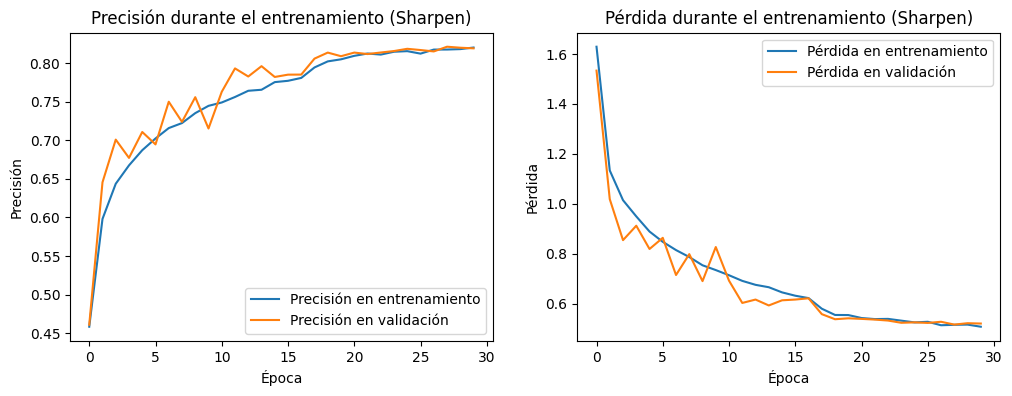

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


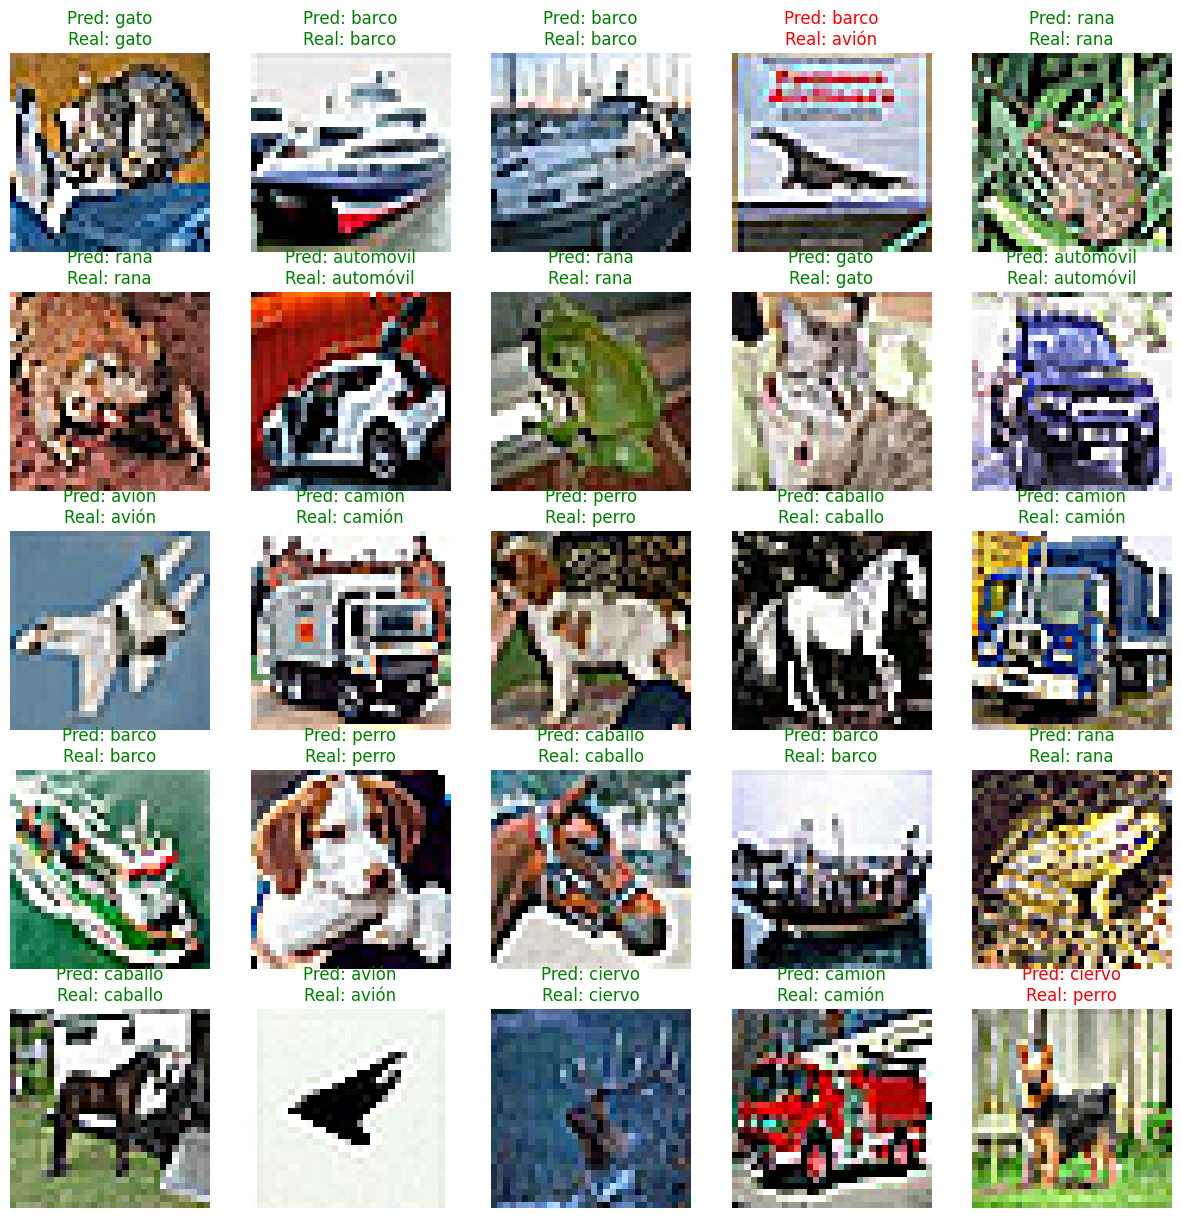


Reporte de Clasificación con filtro sharpen:
              precision    recall  f1-score   support

       avión       0.83      0.83      0.83      1000
   automóvil       0.93      0.91      0.92      1000
      pájaro       0.76      0.72      0.74      1000
        gato       0.70      0.61      0.65      1000
      ciervo       0.75      0.83      0.79      1000
       perro       0.73      0.71      0.72      1000
        rana       0.79      0.90      0.84      1000
     caballo       0.88      0.83      0.86      1000
       barco       0.85      0.93      0.89      1000
      camión       0.91      0.87      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



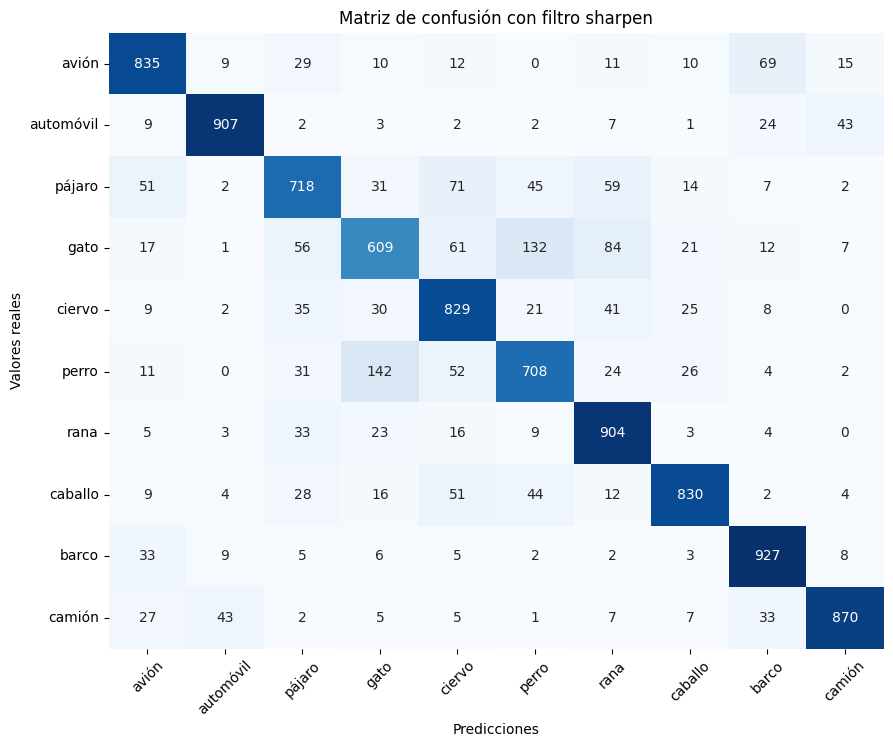

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


#Cargar el conjunto de datos CIFAR-10
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

#Aplicar filtro sharpen
def apply_sharpen(images):
    sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_images = []
    for img in images:
        sharpened = cv2.filter2D(img, -1, sharpen_kernel)
        sharpened_images.append(sharpened)
    return np.array(sharpened_images)

X_train = apply_sharpen(X_train)
X_test = apply_sharpen(X_test)

#Mostrar información sobre el conjunto de datos
print("Forma de los datos de entrenamiento:", X_train.shape)
print("Forma de las etiquetas de entrenamiento:", y_train.shape)
print("Forma de los datos de prueba:", X_test.shape)
print("Forma de las etiquetas de prueba:", y_test.shape)

class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

#Imágenes de ejemplo con filtro sharpen
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Etiqueta: {class_names[y_train[i][0]]}")
    plt.axis('off')
plt.show()

# Preprocesamiento de datos

# Normalización, escalar los valores de píxeles al rango [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Nueva forma de y_train:", y_train.shape)

#Definición de la arquitectura de la CNN con filtro sharpen

model = keras.Sequential([
    #Capa convolucional 1
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    #Capa convolucional 2
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    #Capa convolucional 3
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    #Aplanar los mapas de características para la capa densa
    layers.Flatten(),

    #Capa densa con 256 neuronas
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Capa de salida con 10 neuronas
    layers.Dense(10, activation='softmax')
])
model.summary()

#Compilación del modelo
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Entrenamiento del modelo con filtro sharpen
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
]

history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

#Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión en el conjunto de prueba con filtro sharpen: {test_acc:.4f}")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento (Sharpen)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento (Sharpen)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#Predicciones y ejemplos
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i])
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nReal: {class_names[true_labels[i]]}", color=color)
    plt.axis('off')
plt.show()

#Reporte de clasificación y matriz de confusión
print("\nReporte de Clasificación con filtro sharpen:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión con filtro sharpen')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Justificación del filtro utilizado (Sharpen)
El filtro sharpen se eligió por su capacidad para realzar bordes y detalles finos en las imágenes de CIFAR-10, lo que ayuda a la red neuronal a identificar mejor las características clave de objetos con contornos definidos como aviones, automóviles y barcos. A diferencia de otros filtros (como Sobel que solo detecta bordes o Gaussiano que suaviza demasiado), el sharpen mantiene la información original mientras acentúa las transiciones importantes mediante un kernel. Esto complementa el aprendizaje de la CNN, permitiéndole enfocarse en patrones complejos desde las primeras capas, sin perder información crítica de color o textura.